In [1]:
import numpy as np# linear algebra
import pandas as pd #data processing
# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#category encoder
from sklearn.preprocessing import LabelEncoder
#train_test_split
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#metrics
from sklearn.metrics import mean_squared_error

In [2]:
#load data
data= pd.read_csv("weight-height.csv")

In [3]:
# check shape of data
data.shape

(10000, 3)

In [4]:
# Preview data
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# Summary of dtypes and null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
# Descriptive statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


## Univariate Exploratory data Analysis

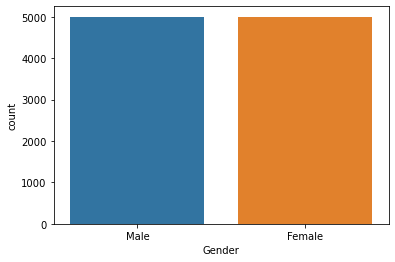

In [7]:
sns.countplot(data['Gender'])

The dataset has equal distribution of sexes

In [8]:
male=data[data["Gender"]=='Male']
female=data[data["Gender"]=='Female']

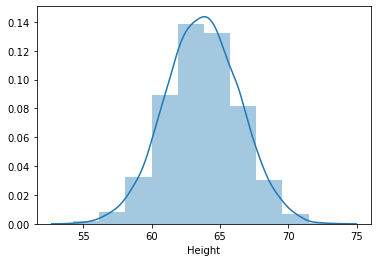

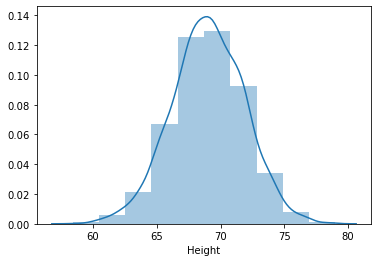

In [9]:
chart2, ax2 = plt.subplots()
chart1, ax1 = plt.subplots()
sns.distplot(male['Height'], bins=10,ax=ax1);
sns.distplot(female['Height'], bins=10,ax=ax2);

## Measure of spread of a height column
- The height of males is spread from 60 to 80 cm
- The height of females is spread from 55 to 75 cm

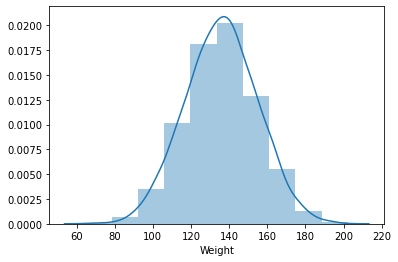

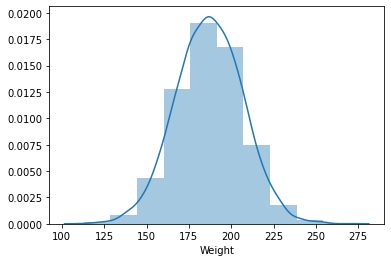

In [10]:
chart2, ax2 = plt.subplots()
chart1, ax1 = plt.subplots()
sns.distplot(male['Weight'], bins=10,ax=ax1);
sns.distplot(female['Weight'], bins=10,ax=ax2);

## Measure of spread of a weight column
- Males weigh from 100 to 275
- females weigh from  60 to 220

## Bivariate Analysis

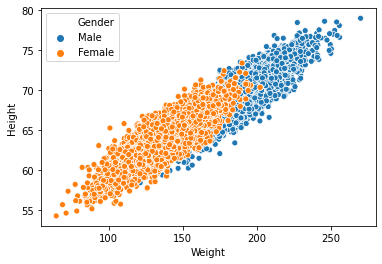

In [11]:
sns.scatterplot(data['Weight'],data['Height'],hue=data['Gender'])

## Males are generally taller and hence weigh more than females

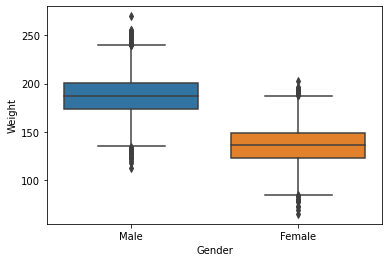

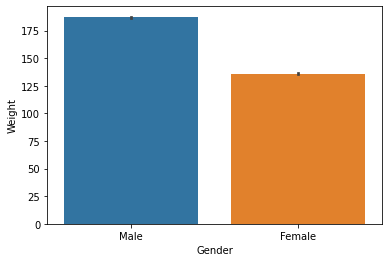

In [12]:


chart2, ax2 = plt.subplots()
chart1, ax1 = plt.subplots()
sns.barplot(data['Gender'],data['Weight'],ax=ax1),sns.boxplot(data['Gender'],data['Weight'],ax=ax2);

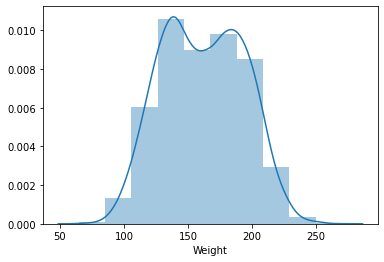

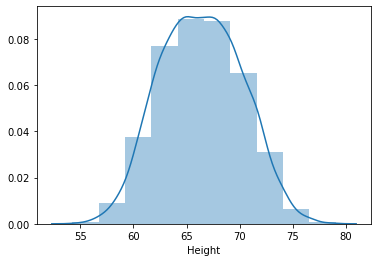

In [13]:
chart2, ax2 = plt.subplots()
chart1, ax1 = plt.subplots()
sns.distplot(data['Height'], bins=10,ax=ax1);
sns.distplot(data['Weight'], bins=10,ax=ax2);


In [14]:

data["Gender"] = LabelEncoder().fit_transform(data["Gender"])

In [15]:
y=data['Weight']
X= data.drop(['Weight'],axis=1)

In [16]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42,test_size=0.2)

In [17]:
lrmodel=LinearRegression(n_jobs=-1)
dtmodel=DecisionTreeRegressor(max_depth=3,random_state=42)
rfmodel=RandomForestRegressor(n_estimators=500,max_depth=3,random_state=42)

In [18]:
LinearRegression?

In [19]:
lrmodel.fit(X_train,y_train)
dtmodel.fit(X_train,y_train)
rfmodel.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=500, random_state=42)

In [20]:
pred1=lrmodel.predict(X_valid)
pred2=dtmodel.predict(X_valid)
pred3=rfmodel.predict(X_valid)

In [21]:
t_pred1=lrmodel.predict(X_train)
t_pred2=dtmodel.predict(X_train)
t_pred3=rfmodel.predict(X_train)

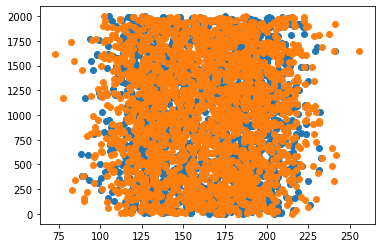

In [22]:
plt.scatter(pred1,range(0,len(y_valid)))
plt.scatter(y_valid,range(0,len(y_valid)))

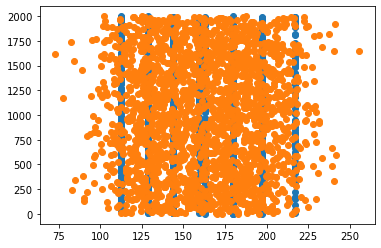

In [23]:
plt.scatter(pred2,range(0,len(y_valid)))
plt.scatter(y_valid,range(0,len(y_valid)))

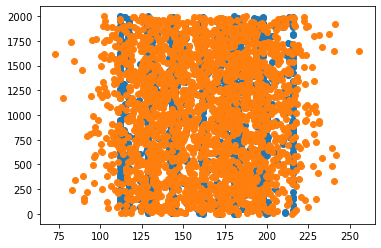

In [24]:
plt.scatter(pred3,range(0,len(y_valid)))
plt.scatter(y_valid,range(0,len(y_valid)))

In [25]:
print("The root mean squared error for model 1(Linear Regression) for the validation set is {}, while the value for the training set is {}".format((np.sqrt(mean_squared_error(y_valid,pred1))),(np.sqrt(mean_squared_error(y_train,t_pred1)))))


The root mean squared error for model 1(Linear Regression) for the validation set is 10.062021490244046, while the value for the training set is 10.000327001474366


In [26]:
print("The root mean squared error for dt model (Decision Tree Regressor) for the validation set is {}, while the value for the training set is {}".format((np.sqrt(mean_squared_error(y_valid,pred2))),(np.sqrt(mean_squared_error(y_train,t_pred2)))))


The root mean squared error for dt model (Decision Tree Regressor) for the validation set is 11.614194804551362, while the value for the training set is 11.421675513461896


In [27]:
print("The root mean squared error for rf model (Random forest Regressor) for the validation set is {}, while the value for the training set is {}".format((np.sqrt(mean_squared_error(y_valid,pred3))),(np.sqrt(mean_squared_error(y_train,t_pred3)))))


The root mean squared error for rf model (Random forest Regressor) for the validation set is 10.912393035701893, while the value for the training set is 10.707120371170898


## Linear Regression performed best on our dataset
